In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpi
import json

from contrastive.utils.config import get_config_diff

In [ ]:
path = "/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders/supervised/hcp"
get_config_diff(path)

In [3]:
def exclude_conditions(diff_config, excluded_conditions):
    excluded_subdirs = []
    for cond in excluded_conditions:
        filtered_diff_config = diff_config.query(cond)
        excluded_subdirs.extend(filtered_diff_config['Unnamed: 0'].values)
    return excluded_subdirs

dir_path = "/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders/convnet/no_foldlabel_4"
diff_config = pd.read_csv(dir_path+'/config_diff.csv')

exclude_conditions(diff_config, excluded_conditions=["lr != 0.0004"])

['14-21-26']

In [4]:
def show_results(dir_path, figsize=(16,10), return_config_diff=False, excluded_conditions=[]):
    # be sure that all models are comparable
    get_config_diff(dir_path, whole_config=False)
    diff_config = pd.read_csv(dir_path+'/config_diff.csv')

    excluded_subdirs = exclude_conditions(diff_config, excluded_conditions)
    if excluded_conditions != []:
        print("Excluded subdirs :", excluded_subdirs)
        print("Excluded because of ", excluded_conditions)

    print(diff_config[~diff_config['Unnamed: 0'].isin(excluded_subdirs)])

    paths = []
    accuracy = []
    accuracy_std = []
    auc = []
    auc_std = []
    # plot all ROC curves
    for subdir in os.listdir(dir_path):
        if os.path.isdir(dir_path + '/' + subdir) and subdir not in excluded_subdirs:
            path = dir_path + '/' + subdir + '/cingulate_ACCpatterns_embeddings'
            with open(path+'/values.json', 'r') as file:
                values = json.load(file)
            print(subdir)
            print("AUC", values['cross_val_auc'])
            img = mpi.imread(path+'/cross_val_ROC_curves.png')
            plt.figure(figsize=figsize)
            plt.imshow(img)
            plt.show()

            # store the AUC and accuracy in a df
            paths.append(subdir)
            accuracy.append(values['cross_val_total_accuracy'][0])
            accuracy_std.append(values['cross_val_total_accuracy'][1])
            auc.append(values['cross_val_auc'][0])
            auc_std.append(values['cross_val_auc'][1])

    results_df = pd.DataFrame()
    results_df['path'] = paths
    results_df['auc'] = auc
    results_df['auc_std'] = auc_std
    results_df['accuracy'] = accuracy
    results_df['accuracy_std'] = accuracy_std


    if return_config_diff:
        return results_df, diff_config
    else:
        return results_df

                      Unnamed: 0  drop_rate  foldlabel  max_angle  \
0      conv_30_drop=0.15_T=mixed       0.15       True          6   
1         conv_4_drop=0.15_T=0.5       0.15       True          6   
2        conv_4_drop=0.3_T=mixed       0.30       True          6   
3           conv_4_drop=0._T=0.5       0.00       True          6   
4     conv_no_4_drop=0.3_T=mixed       0.30      False         10   
5       dense_10_drop=0.15_T=0.1       0.15       True          6   
6       dense_30_drop=0.15_T=0.1       0.15       True          6   
7   dense_30_drop=0.15_T=0.1_bis       0.15       True          6   
8        dense_4_drop=0.15_T=0.5       0.15       True          6   
9          dense_4_drop=0._T=0.5       0.00       True          6   
10     dense_4_drop=0._T=0.5_bis       0.00       True          6   

    num_outputs  num_representation_features  temperature  \
0            30                           30          0.1   
1             4                            4     

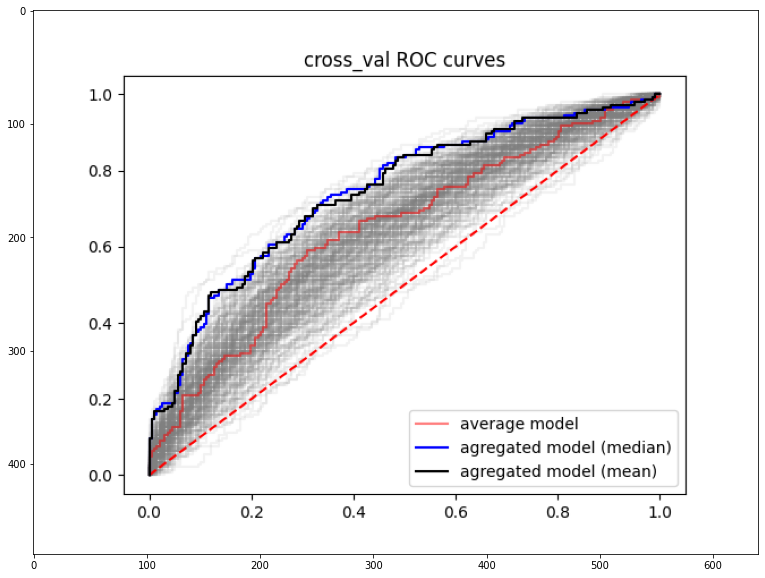

conv_4_drop=0._T=0.5
AUC [0.6079561477721376, 0.06124492480319883]


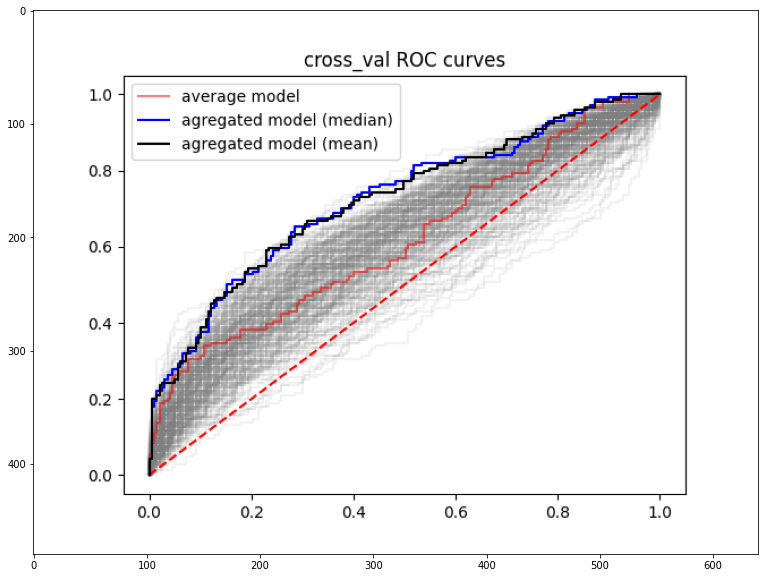

dense_10_drop=0.15_T=0.1
AUC [0.501084179357022, 0.039473311345170216]


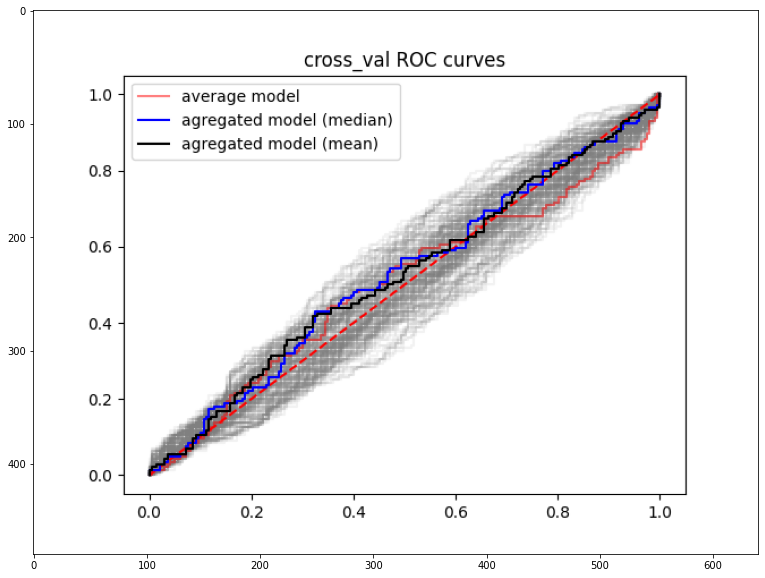

conv_4_drop=0.15_T=0.5
AUC [0.6169605188945291, 0.06113009306349295]


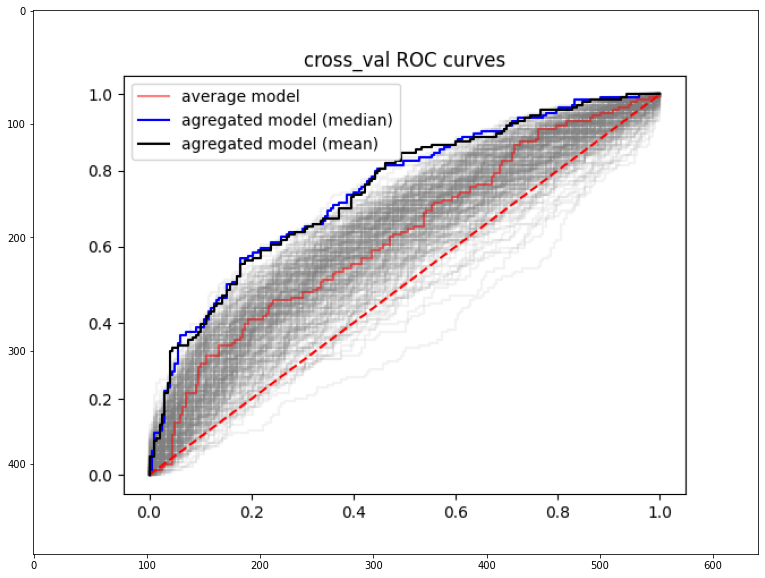

dense_4_drop=0._T=0.5_bis
AUC [0.5289858996051889, 0.0457724860757109]


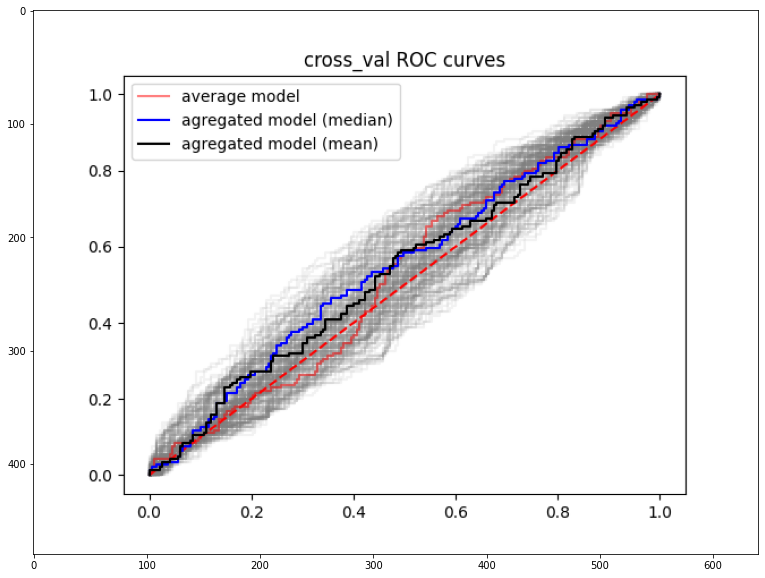

dense_30_drop=0.15_T=0.1_bis
AUC [0.550463056965595, 0.04114598916973249]


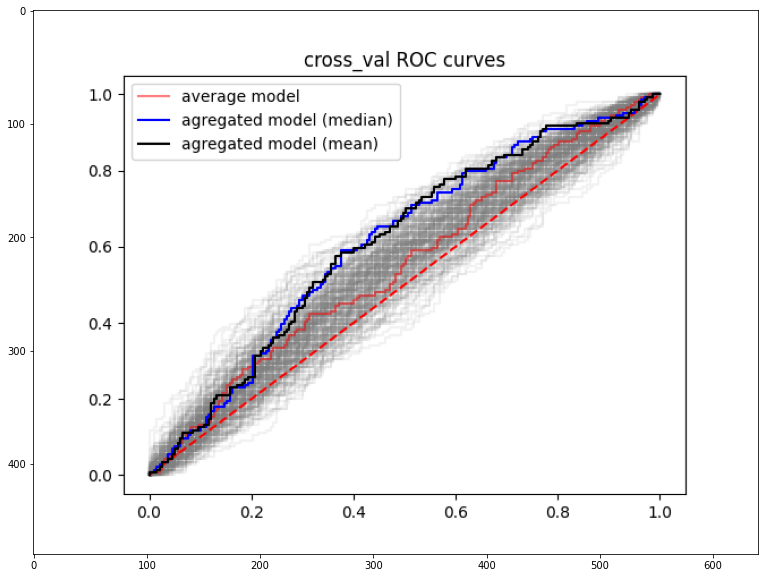

dense_30_drop=0.15_T=0.1
AUC [0.5263581500282009, 0.03834931918082147]


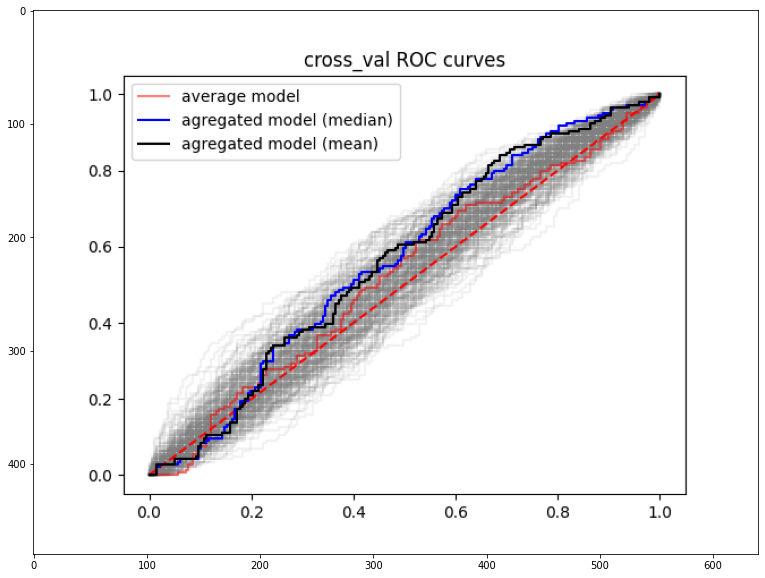

conv_no_4_drop=0.3_T=mixed
AUC [0.4798876198533559, 0.028113597222716634]


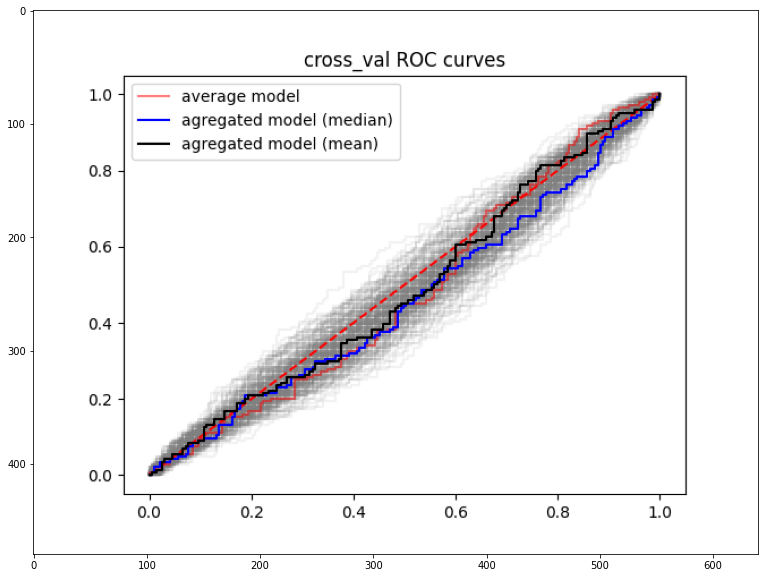

dense_4_drop=0._T=0.5
AUC [0.5414554427523972, 0.042969900443637986]


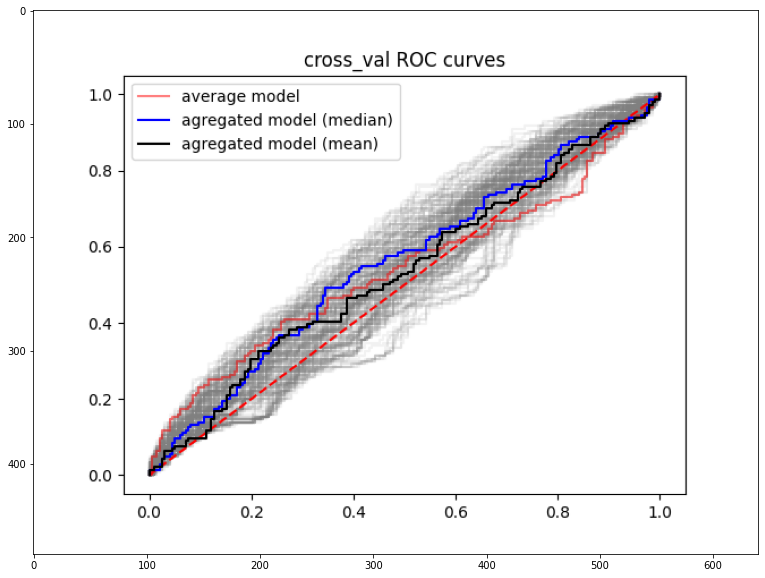

dense_4_drop=0.15_T=0.5
AUC [0.47562337845459673, 0.029489640042257927]


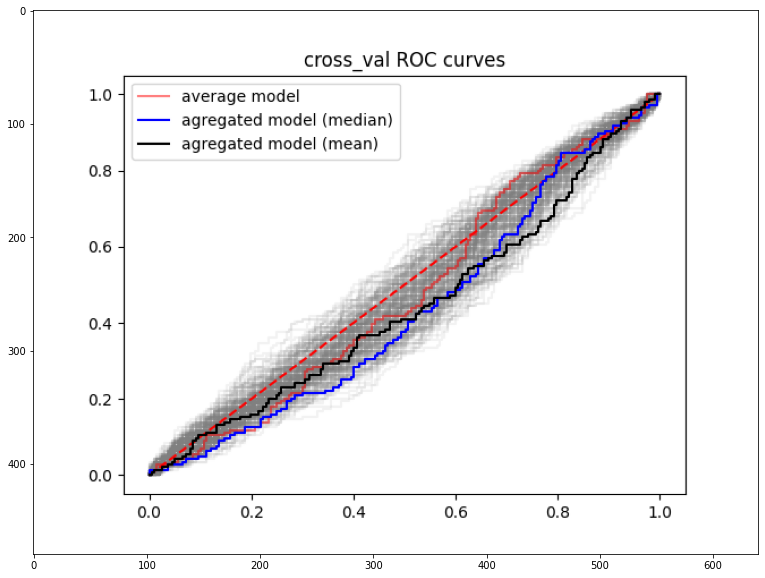

conv_4_drop=0.3_T=mixed
AUC [0.4705800902425268, 0.029979059173385815]


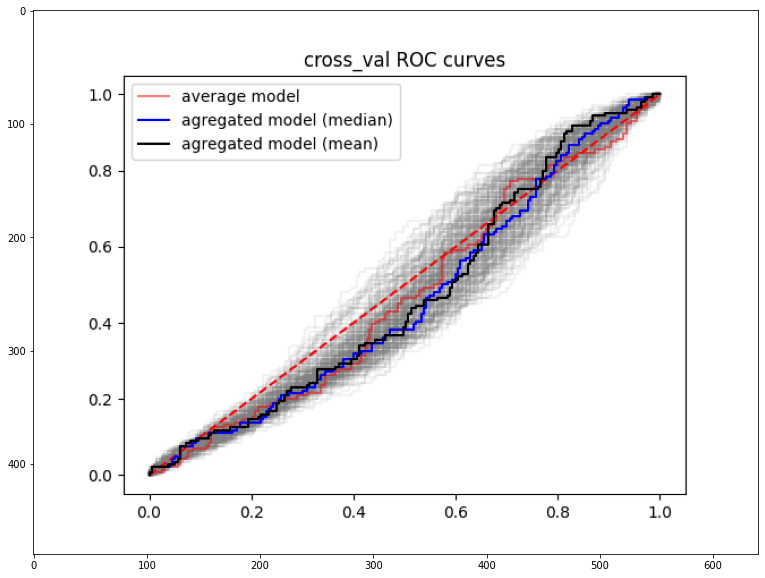

path       auc   auc_std  accuracy  accuracy_std
0      conv_30_drop=0.15_T=mixed  0.639006  0.051169  0.609478      0.041877
1           conv_4_drop=0._T=0.5  0.607956  0.061245  0.616012      0.037890
2       dense_10_drop=0.15_T=0.1  0.501084  0.039473  0.519073      0.048169
3         conv_4_drop=0.15_T=0.5  0.616961  0.061130  0.603777      0.046312
4      dense_4_drop=0._T=0.5_bis  0.528986  0.045772  0.510358      0.052875
5   dense_30_drop=0.15_T=0.1_bis  0.550463  0.041146  0.546745      0.036537
6       dense_30_drop=0.15_T=0.1  0.526358  0.038349  0.524598      0.036275
7     conv_no_4_drop=0.3_T=mixed  0.479888  0.028114  0.571472      0.007692
8          dense_4_drop=0._T=0.5  0.541455  0.042970  0.505349      0.048654
9        dense_4_drop=0.15_T=0.5  0.475623  0.029490  0.506862      0.039155
10       conv_4_drop=0.3_T=mixed  0.470580  0.029979  0.570804      0.006813

In [6]:
excluded_conditions = []

results_df = show_results("/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders/supervised/acc/joel",
excluded_conditions=excluded_conditions)

results_df

In [18]:
results_df.sort_values(ascending=False, by='auc')[['path', 'auc']]

path       auc
0      conv_30_drop=0.15_T=mixed  0.639006
3         conv_4_drop=0.15_T=0.5  0.616961
1           conv_4_drop=0._T=0.5  0.607956
5   dense_30_drop=0.15_T=0.1_bis  0.550463
8          dense_4_drop=0._T=0.5  0.541455
4      dense_4_drop=0._T=0.5_bis  0.528986
6       dense_30_drop=0.15_T=0.1  0.526358
2       dense_10_drop=0.15_T=0.1  0.501084
7     conv_no_4_drop=0.3_T=mixed  0.479888
9        dense_4_drop=0.15_T=0.5  0.475623
10       conv_4_drop=0.3_T=mixed  0.470580

                 Unnamed: 0      lr              model  with_labels
0                 lr=0.0004  0.0004  SimCLR_supervised         True
1                 lr=0.0008  0.0008  SimCLR_supervised         True
2  non_supervised_lr=0.0008  0.0008             SimCLR        False
lr=0.0004
AUC [0.5323880428652003, 0.06596859044506308]


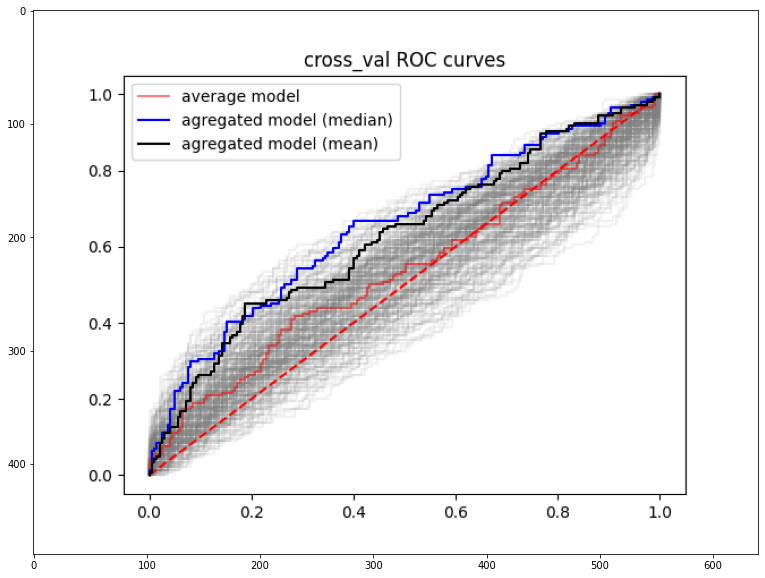

non_supervised_lr=0.0008
AUC [0.5557026226734348, 0.039673316186295174]


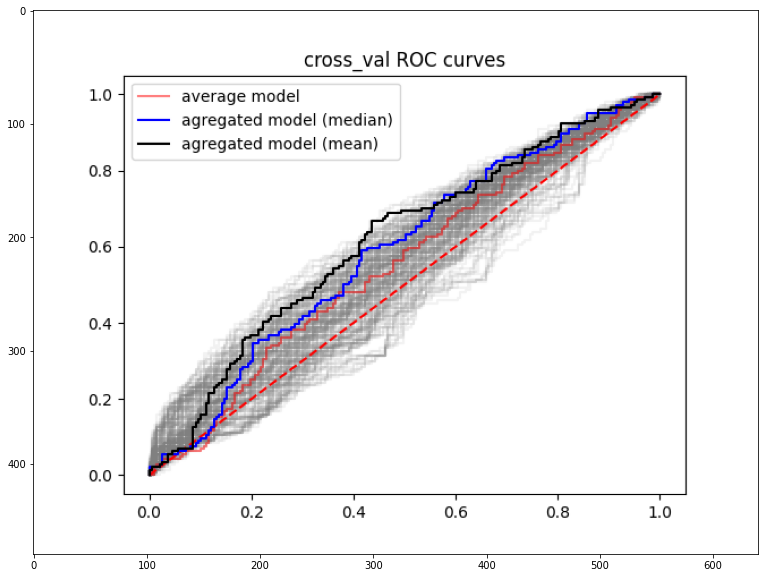

lr=0.0008
AUC [0.5648154258319233, 0.057455325673987444]


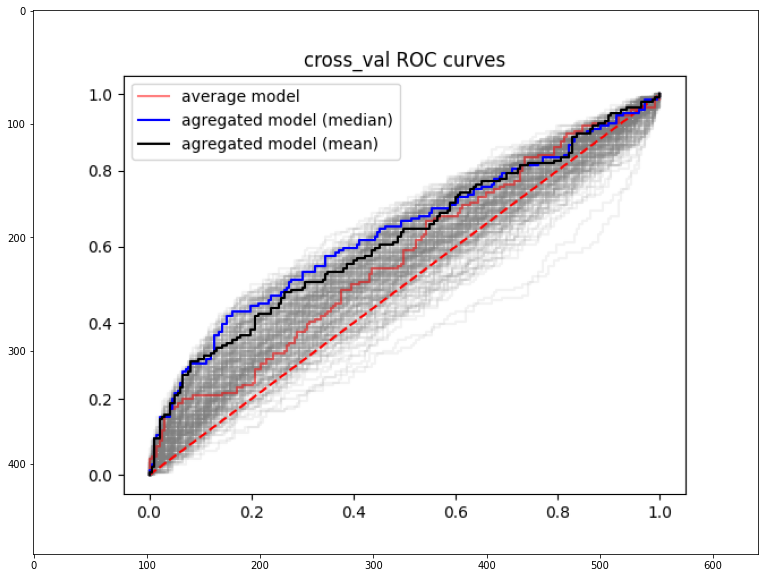

path       auc   auc_std  accuracy  accuracy_std
0                 lr=0.0004  0.532388  0.065969  0.558815      0.043669
1  non_supervised_lr=0.0008  0.555703  0.039673  0.515437      0.050880
2                 lr=0.0008  0.564815  0.057455  0.593935      0.041884

In [20]:
excluded_conditions = []

results_df = show_results("/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders/supervised/acc/aymeric",
excluded_conditions=excluded_conditions)

results_df

In [22]:
results_df.sort_values(ascending=False, by='auc')[['path', 'auc']]

path       auc
2                 lr=0.0008  0.564815
1  non_supervised_lr=0.0008  0.555703
0                 lr=0.0004  0.532388

       Unnamed: 0  batch_size  drop_rate  foldlabel       input_size  \
0     1mm_fold_30          16       0.15       True  (1, 22, 46, 38)   
1      1mm_fold_4          16       0.15       True  (1, 22, 46, 38)   
2       1mm_no_30          16       0.15      False  (1, 22, 46, 38)   
3        1mm_no_4          16       0.15      False  (1, 22, 46, 38)   
4     1mm_no_4(2)          16       0.15      False  (1, 22, 46, 38)   
5          T_0.01          16       0.15      False  (1, 17, 40, 38)   
6           T_0.5          16       0.15      False  (1, 17, 40, 38)   
7             T_1          16       0.15      False  (1, 17, 40, 38)   
8           base1          16       0.15      False  (1, 17, 40, 38)   
9           base2          16       0.15      False  (1, 17, 40, 38)   
10          base3          16       0.15      False  (1, 17, 40, 38)   
11   batch_size_4           4       0.15      False  (1, 17, 40, 38)   
12  batch_size_64          64       0.15      False  (1, 17, 40,

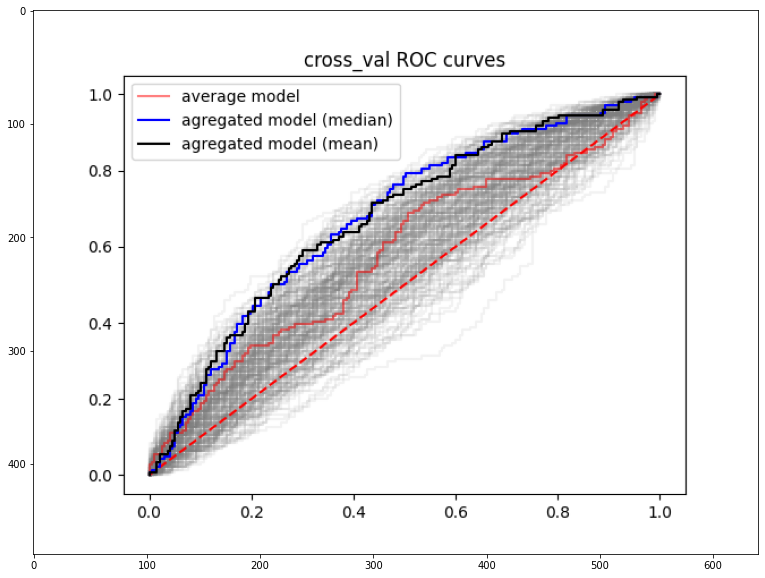

drop_rate_0.6
AUC [0.5306190073322052, 0.04491732965441525]


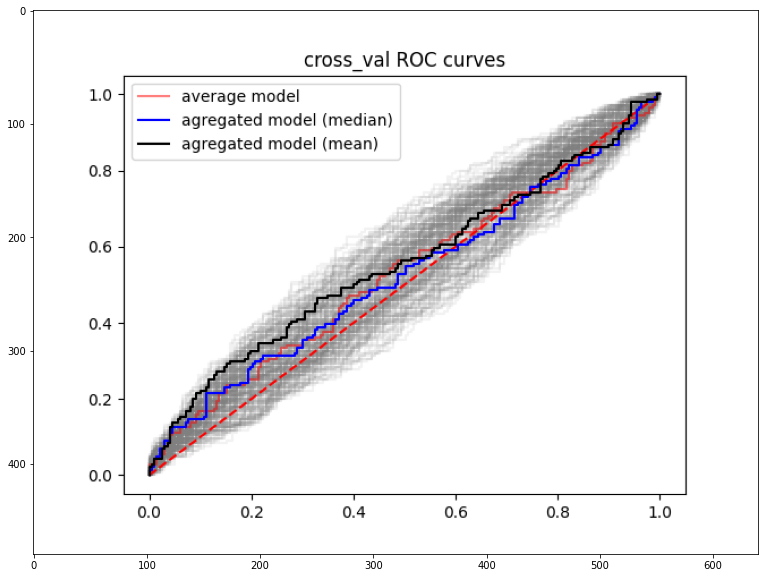

T_1
AUC [0.6556744218838128, 0.03923542967873721]


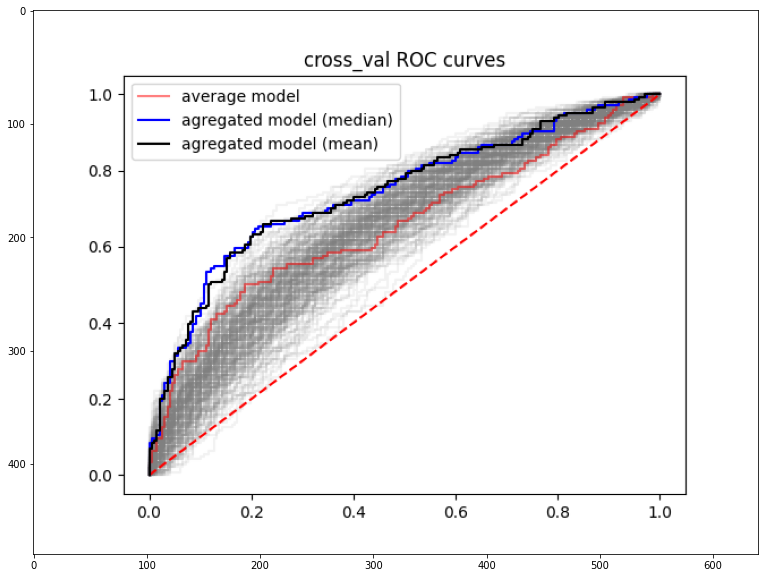

drop_rate_0.3
AUC [0.6098822617033277, 0.047838708739584776]


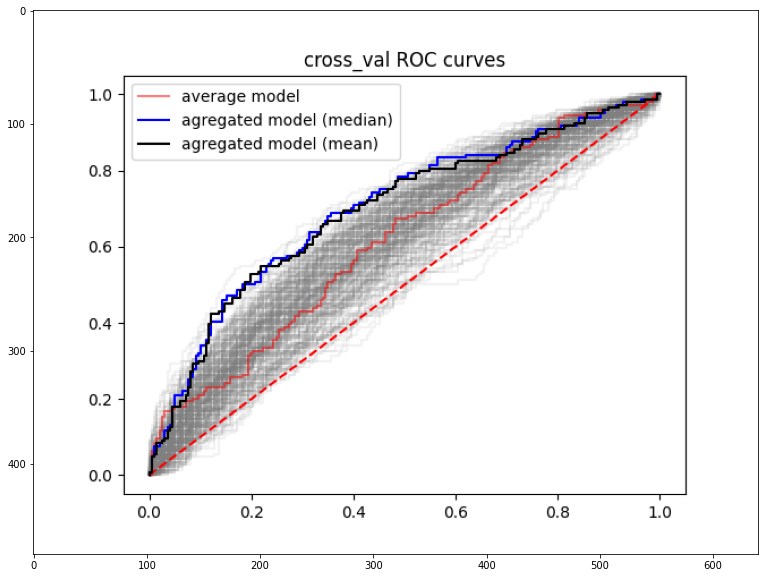

T_0.5
AUC [0.6242667794698252, 0.045173011362606555]


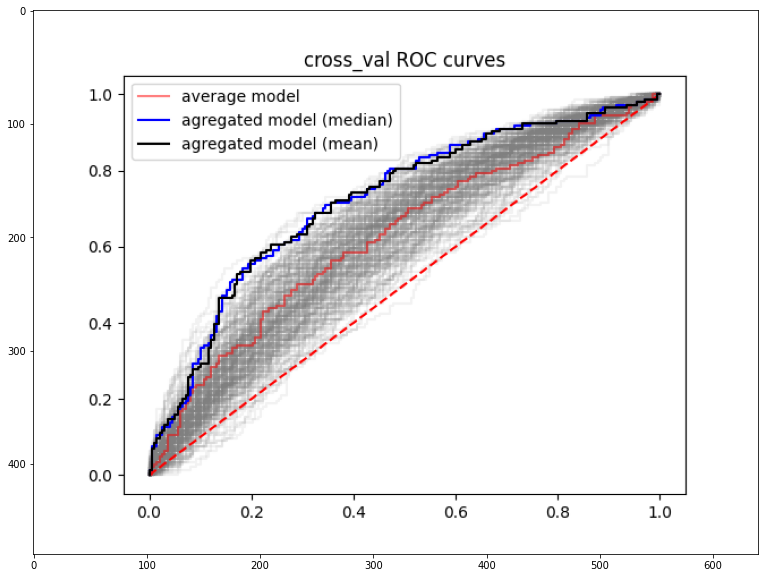

batch_size_64
AUC [0.6366903553299493, 0.04478391910327635]


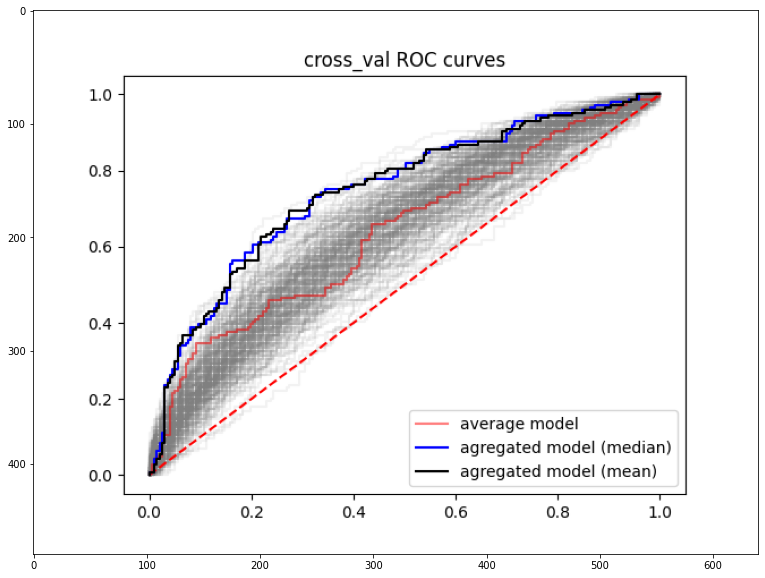

1mm_no_4(2)
AUC [0.569887760857304, 0.046849207946765725]


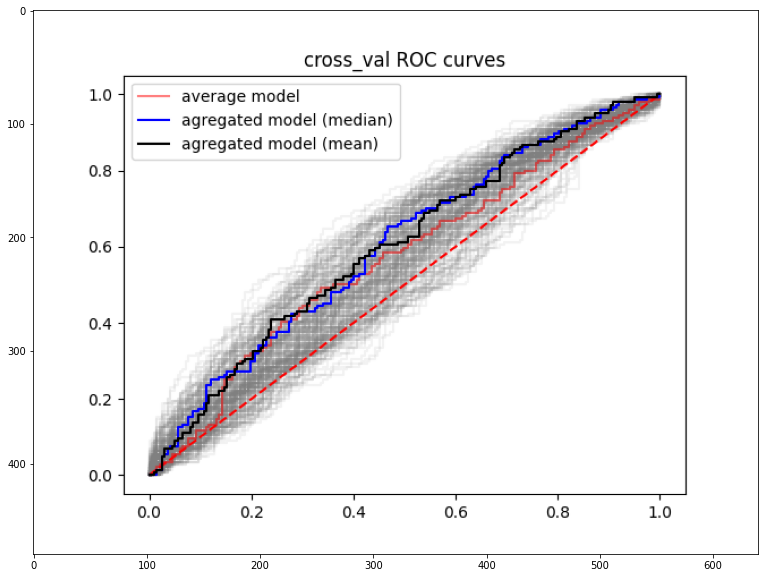

batch_size_4
AUC [0.6176228144388042, 0.044589424149593174]


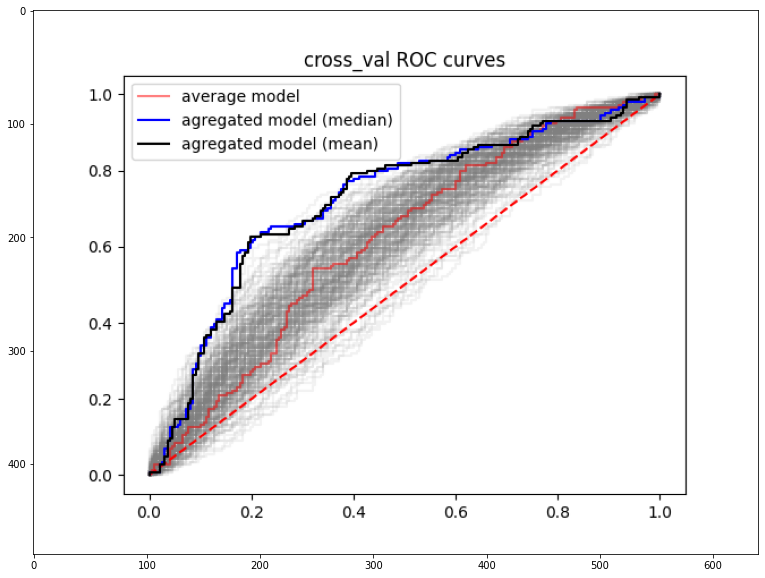

T_0.01
AUC [0.6263353073886069, 0.050238326156129144]


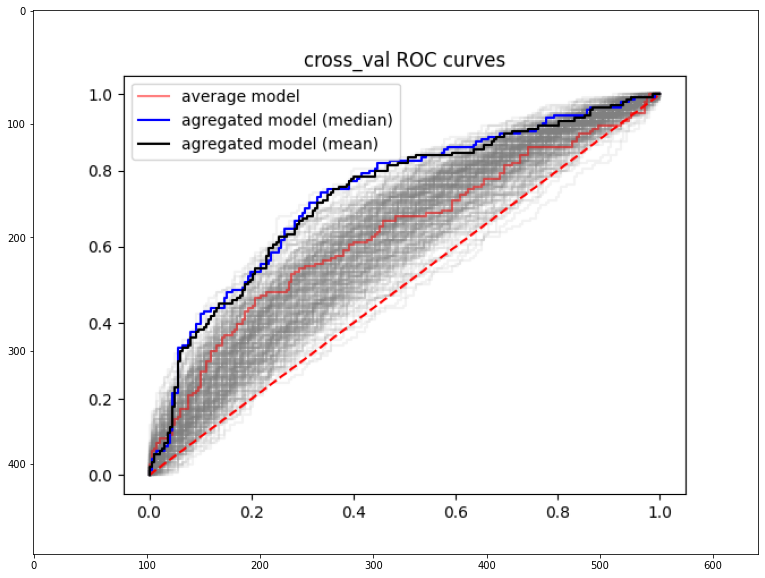

base2
AUC [0.6481143542019177, 0.04404085213475138]


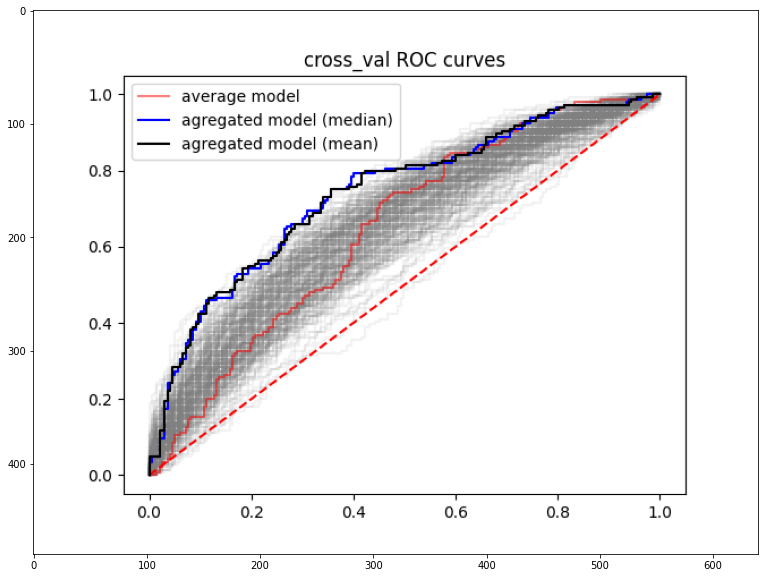

drop_rate_0
AUC [0.6541638465877044, 0.04183625292598137]


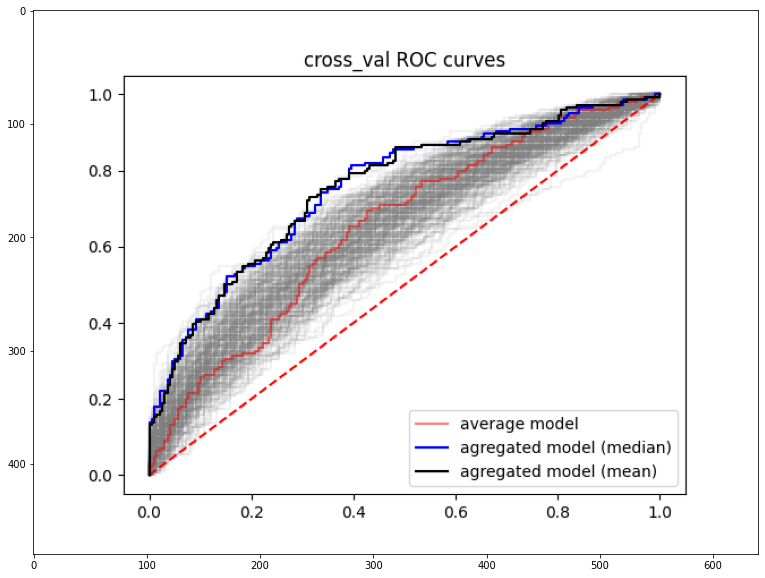

base1
AUC [0.673959108855048, 0.04164537487356842]


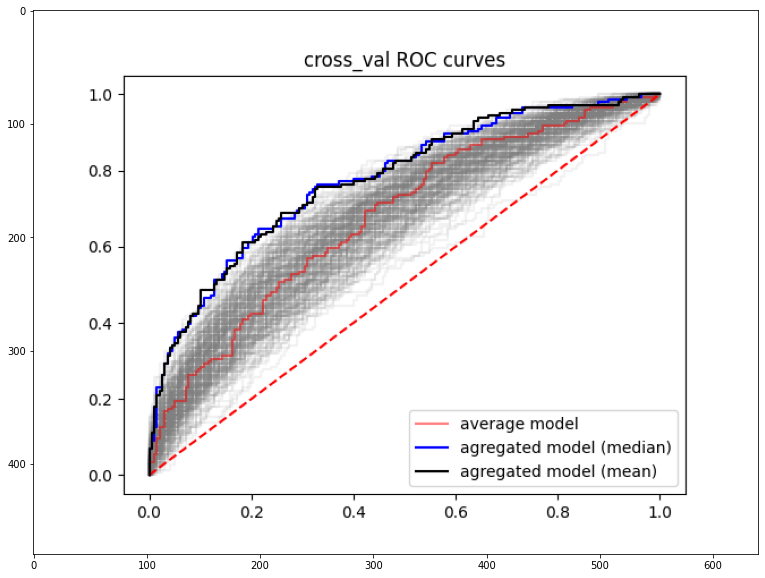

1mm_no_4
AUC [0.4884705301748449, 0.035179791318902316]


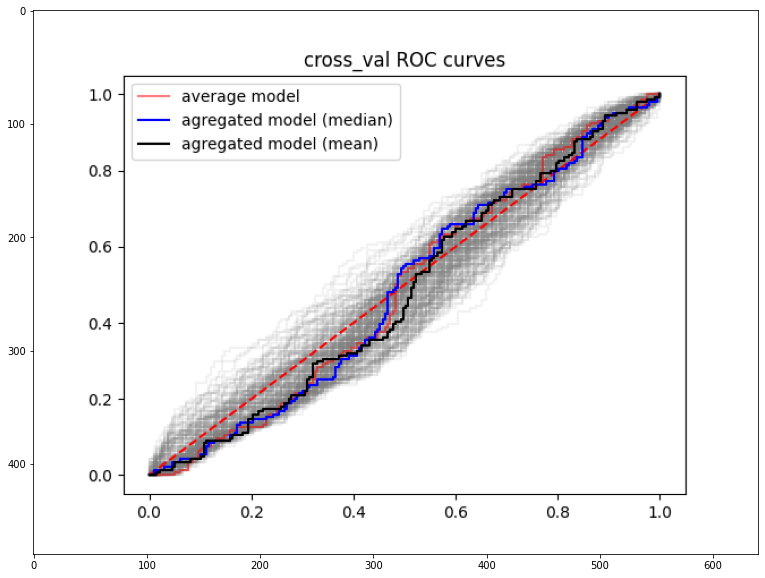

1mm_fold_30
AUC [0.5865493513818387, 0.03723043254420536]


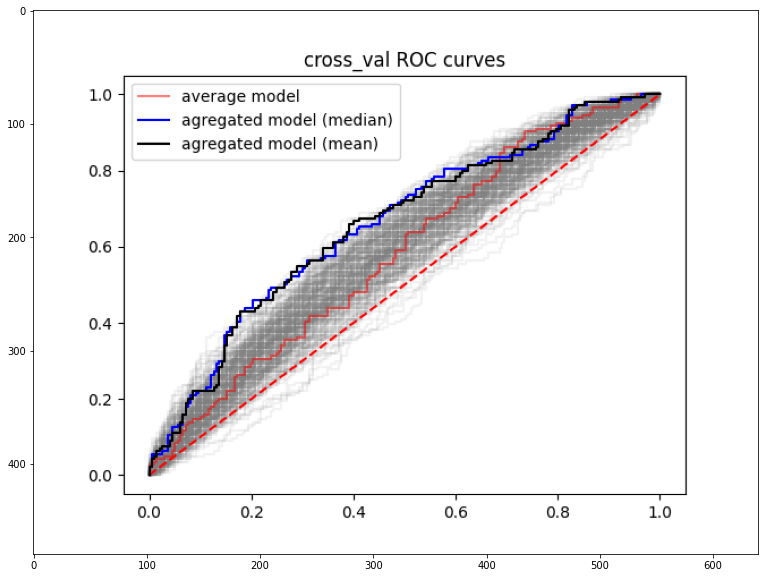

base3
AUC [0.6447695995487873, 0.040686019034973216]


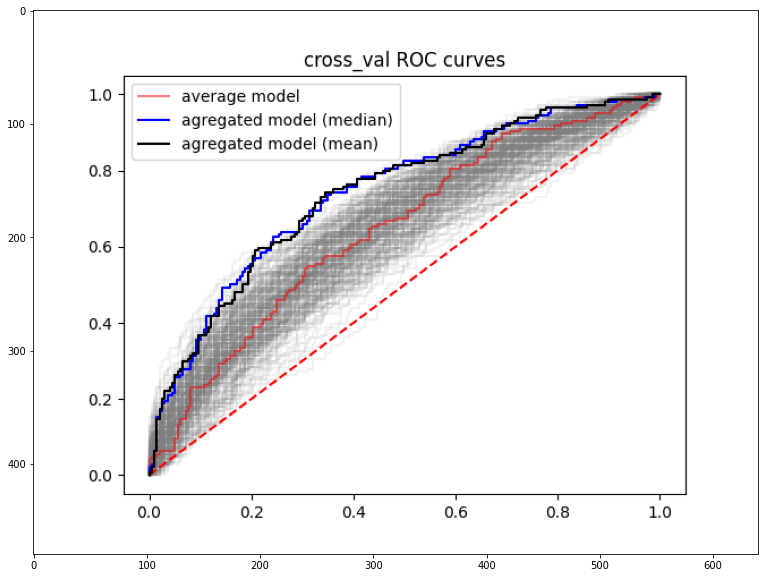

1mm_no_30
AUC [0.5822251833051325, 0.041573037169192716]


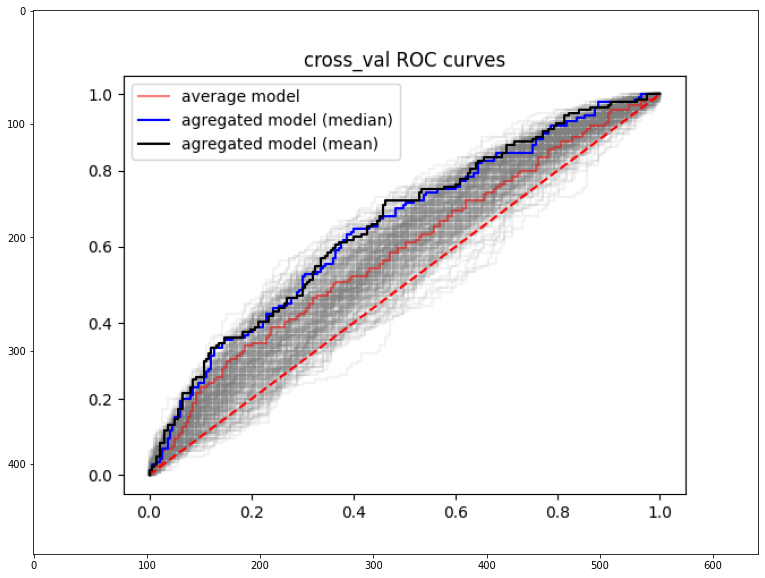

path       auc   auc_std  accuracy  accuracy_std
0      1mm_fold_4  0.574575  0.063551  0.555718      0.051553
1   drop_rate_0.6  0.530619  0.044917  0.518217      0.051808
2             T_1  0.655674  0.039235  0.618815      0.039304
3   drop_rate_0.3  0.609882  0.047839  0.585232      0.038250
4           T_0.5  0.624267  0.045173  0.595320      0.039513
5   batch_size_64  0.636690  0.044784  0.606639      0.035734
6     1mm_no_4(2)  0.569888  0.046849  0.552891      0.040838
7    batch_size_4  0.617623  0.044589  0.590909      0.040715
8          T_0.01  0.626335  0.050238  0.598792      0.041902
9           base2  0.648114  0.044041  0.611543      0.037142
10    drop_rate_0  0.654164  0.041836  0.616446      0.036519
11          base1  0.673959  0.041645  0.629466      0.034312
12       1mm_no_4  0.488471  0.035180  0.548809      0.032750
13    1mm_fold_30  0.586549  0.037230  0.562088      0.034258
14          base3  0.644770  0.040686  0.610534      0.032800
15      1mm_no_30  0.582225  0.041573  0.553138      0.043799

In [7]:
# convnet exploration
excluded_conditions = []

results_df = show_results("/neurospin/dico/agaudin/Runs/03_monkeys/Output/convnet_exploration",
excluded_conditions=excluded_conditions)

results_df

In [8]:
results_df.sort_values(ascending=False, by='auc')[['path', 'auc']]

path       auc
11          base1  0.673959
2             T_1  0.655674
10    drop_rate_0  0.654164
9           base2  0.648114
14          base3  0.644770
5   batch_size_64  0.636690
8          T_0.01  0.626335
4           T_0.5  0.624267
7    batch_size_4  0.617623
3   drop_rate_0.3  0.609882
13    1mm_fold_30  0.586549
15      1mm_no_30  0.582225
0      1mm_fold_4  0.574575
6     1mm_no_4(2)  0.569888
1   drop_rate_0.6  0.530619
12       1mm_no_4  0.488471

In [11]:
# directories are supposed to have a certain structure and name patterns
def get_results_table(dir_path, model_types=['convnet', 'densenet2'], verbose=False):
    results = {k: {} for k in model_types}

    for model_type in os.listdir(dir_path):
        if model_type in model_types:
            if verbose:
                print(model_type)
            path = os.path.join(dir_path, model_type)
            for params in os.listdir(path):
                params_path = os.path.join(path, params)
                if os.path.isdir(params_path):
                    if verbose:
                        print(params)
                    
                    n_models = 0

                    if model_type == 'pca':
                        results[model_type]['foldlabel_'+params] = 0
                        results[model_type]['no_foldlabel_'+params] = 0
                    else:    
                        results[model_type][params] = 0
                    
                    for model in os.listdir(params_path):
                        model_path = os.path.join(params_path, model)
                        # start a model name by & to filter it out of the performance analysis
                        if os.path.isdir(model_path) and model[0] != '&':
                            if verbose:
                                print(model)

                            n_models += 1

                            if model_type == 'pca':
                                values = os.path.join(params_path, model, 'values.json')
                                with open(values, 'r') as file:
                                    values = json.load(file)
                                results[model_type]['foldlabel_'+params] += values['cross_val_auc'][0]
                                results[model_type]['no_foldlabel_'+params] += values['cross_val_auc'][0]
                            else:
                                values = os.path.join(params_path, model, 'cingulate_ACCpatterns_embeddings/values.json')
                                with open(values, 'r') as file:
                                    values = json.load(file)
                                results[model_type][params] += values['cross_val_auc'][0]
                    
                    if model_type == 'pca':
                        results[model_type]['foldlabel_'+params] = results[model_type]['foldlabel_'+params]/n_models
                        results[model_type]['no_foldlabel_'+params] = results[model_type]['no_foldlabel_'+params]/n_models
                    else:
                        results[model_type][params] = results[model_type][params]/n_models
    
    results_df = pd.DataFrame(results)
    results_df.sort_index(inplace=True)
    return results_df

In [12]:
dir_path = "/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders"
results_df = get_results_table(dir_path, model_types=['convnet', 'densenet2', 'pca'])

results_df.to_csv("/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders/performance_comparison_5000.csv")

results_df

convnet  densenet2       pca
foldlabel_30     0.613729   0.658608  0.593625
foldlabel_4      0.589703   0.574395  0.538784
no_foldlabel_30  0.649748   0.575910  0.593625
no_foldlabel_4   0.514435   0.488433  0.538784